In [83]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd 
from sklearn import metrics

from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM, Reshape


# Graphs

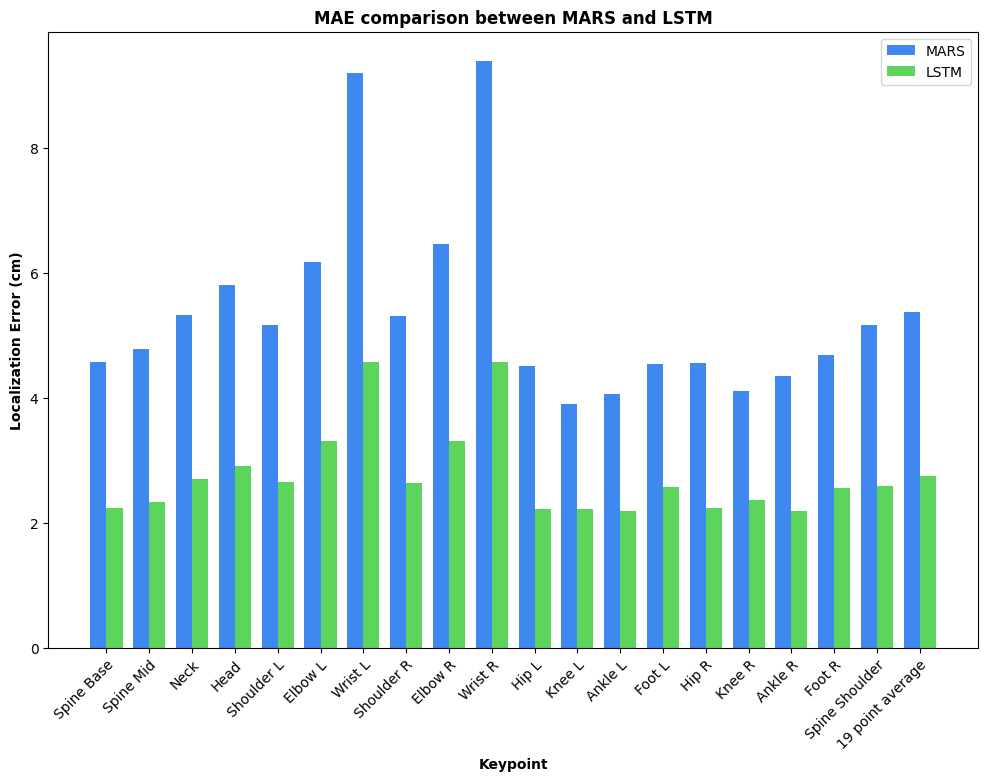

In [84]:
# Bar graph comparing localization error of two models

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/MARS_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')


keypoint_labels = np.array(['Spine Base', 'Spine Mid', 'Neck', 'Head', 'Shoulder L', 'Elbow L', 'Wrist L', 'Shoulder R', 'Elbow R', 'Wrist R', 
                        'Hip L', 'Knee L', 'Ankle L', 'Foot L', 'Hip R', 'Knee R', 'Ankle R', 'Foot R', 'Spine Shoulder', '19 point average'])
n_keypoints = len(keypoint_labels)

mae = np.array([MARS_accuracy_data[:, 6], LSTM_accuracy_data[:, 6]])
rmse = np.array([MARS_accuracy_data[:, 7], LSTM_accuracy_data[:, 7]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(n_keypoints) * 2
width = 0.75

# Plot the data
ax.bar(x - width/2, mae[0], width, label='MARS', color='#3e88ef')
ax.bar(x + width/2, mae[1], width, label='LSTM', color='#5dd55d')

# Add values on top of the bars
# for i in range(n_keypoints):
#     ax.text(x[i] + 0.05, localization_error[0, i] + 0.1, f'{localization_error[0, i]:.2f}', ha='center', va='bottom', weight='bold', color='#3e88ef')
#     ax.text(x[i] + width + 0.05, localization_error[1, i] + 0.1, f'{localization_error[1, i]:.2f}', ha='center', va='bottom', weight='bold', color='#5dd55d')

# Add labels and legend
ax.set_title('MAE comparison between MARS and LSTM', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Keypoint', weight='black')
ax.legend()
plt.show(block=True)
# plt.savefig('models/Accuracy/localization_error_MARS_vs_LSTM.png')




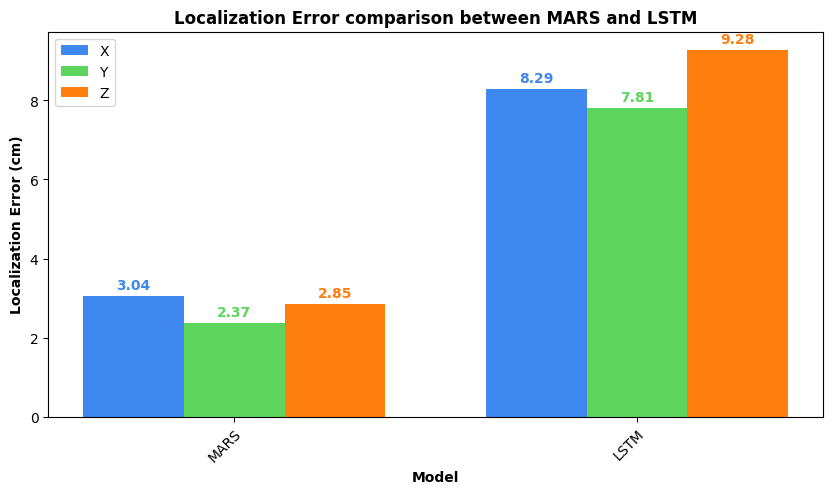

In [85]:
# Bar graph of Localization error for each axis for MARS and LSTM

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/AST_LSTM_3_accuracy.npy')

axis_labels = np.array(['MARS', 'LSTM'])
n_models = len(axis_labels)

mae = np.array([MARS_accuracy_data[19, [0, 2, 4]], LSTM_accuracy_data[19, [0, 2, 4]]])
rmse = np.array([MARS_accuracy_data[19, [1, 3, 5]], LSTM_accuracy_data[19, [1, 3, 5]]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(n_models)
width = 0.5

# Plot the data grouped by axis
ax.bar(x - width / 2, mae[:, 0], width/2, label='X', color='#3e88ef')
ax.bar(x, mae[:, 1], width/2, label='Y', color='#5dd55d')
ax.bar(x + width / 2, mae[:, 2], width/2, label='Z', color='#ff7f0e')

# Add values on top of the bars
for i in range(n_models):
    ax.text(x[i] - width / 2, mae[i, 0] + 0.1, f'{mae[i, 0]:.2f}', ha='center', va='bottom', weight='bold', color='#3e88ef')
    ax.text(x[i], mae[i, 1] + 0.1, f'{mae[i, 1]:.2f}', ha='center', va='bottom', weight='bold', color='#5dd55d')
    ax.text(x[i] + width / 2, mae[i, 2] + 0.1, f'{mae[i, 2]:.2f}', ha='center', va='bottom', weight='bold', color='#ff7f0e')

# Add labels and legend
ax.set_title('Localization Error comparison between MARS and LSTM', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(axis_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Model', weight='black')
ax.legend()

# Set the y-axis limits
# ax.set_ylim(0, 8)

plt.show(block=True)




C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_23484\1316857116.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, patch_artist=True, labels=['MAE', 'MAE', 'RMSE', 'RMSE'])


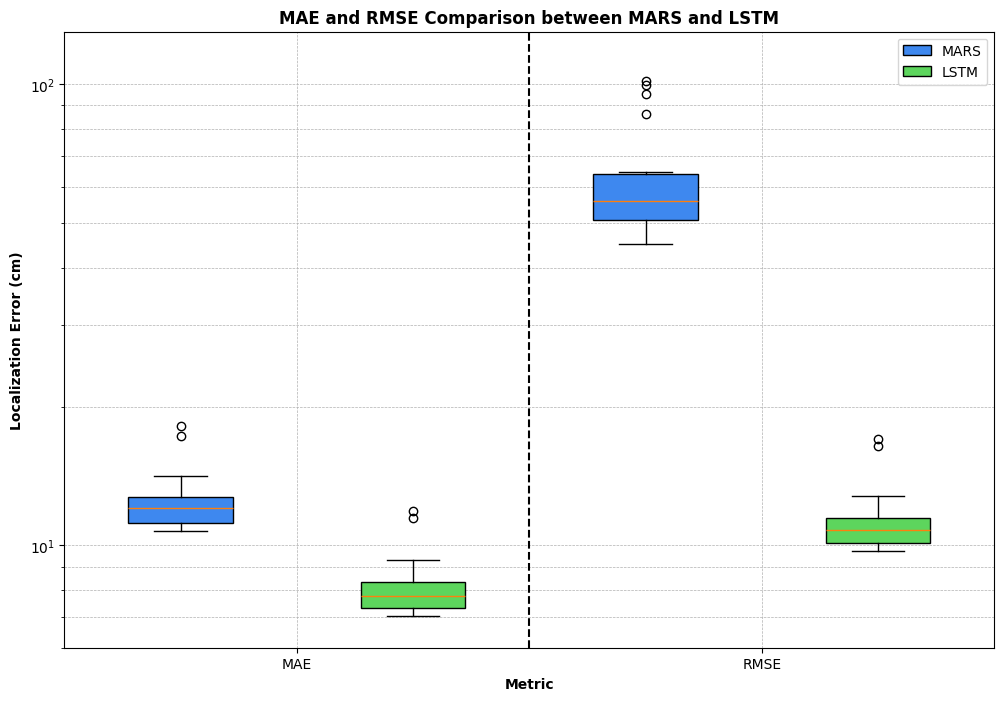

In [86]:
import numpy as np

# MARS Dataset
mars  = np.loadtxt('models/Accuracy/MARS_accuracy_paper.txt')
lstm = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')

# Moving Target Dataset
mars = np.load('models/Accuracy/AST_MARS_accuracy.npy')
lstm = np.load('models/Accuracy/AST_Temporal_accuracy.npy')

mars_mae = mars[:,6]
mars_rmse = mars[:,7]

lstm_mae = lstm[:,6]
lstm_rmse = lstm[:,7]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a list of data arrays for each model
data = [mars_mae, lstm_mae, mars_rmse, lstm_rmse]
labels = ['MARS', 'LSTM']
colors = ['#3e88ef', '#5dd55d', '#3e88ef', '#5dd55d']

# Create box plots for each data array
bplot = ax.boxplot(data, patch_artist=True, labels=['MAE', 'MAE', 'RMSE', 'RMSE'])

# Set colors for each box plot
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Add a vertical line
ax.axvline(x=n_models + 0.5, color='black', linestyle='--')

# Add labels and legend
ax.set_title('MAE and RMSE Comparison between MARS and LSTM', weight='black')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Metric', weight='black')
ax.set_xticks([1.5, 3.5])
ax.set_xticklabels(['MAE', 'RMSE'])
ax.legend([bplot['boxes'][0], bplot['boxes'][1]], ['MARS', 'LSTM'])

ax.set_ylim([6, 130])
ax.set_yscale('log')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show(block=True)

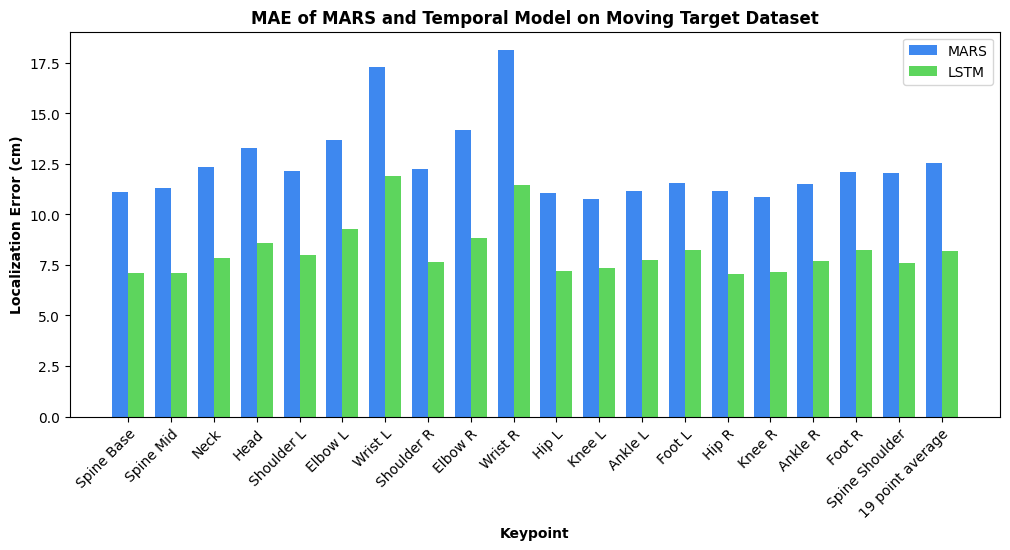

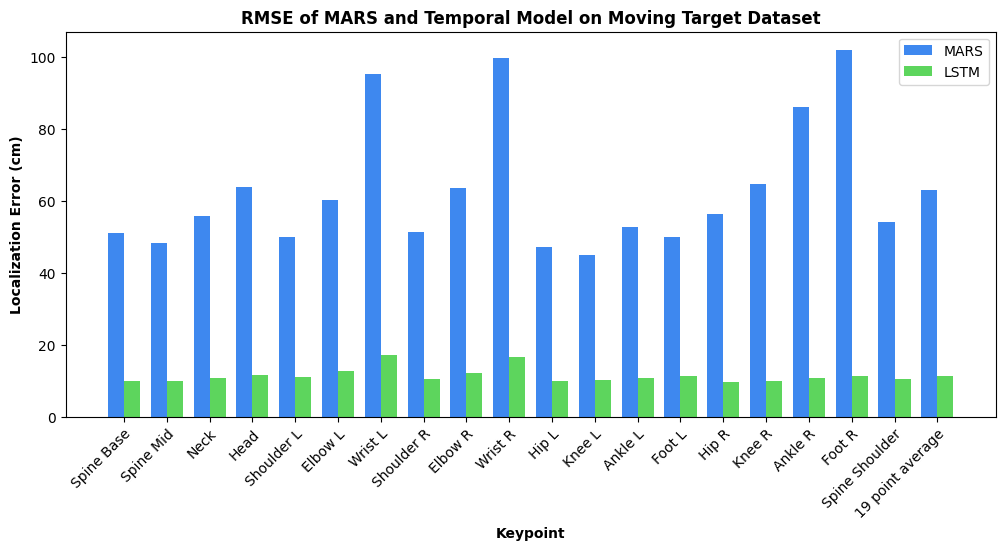

In [87]:
# Bar graph comparing localization error of two models

# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/AST_MARS_accuracy.npy')
LSTM_accuracy_data = np.load('models/Accuracy/AST_Temporal_accuracy.npy')


keypoint_labels = np.array(['Spine Base', 'Spine Mid', 'Neck', 'Head', 'Shoulder L', 'Elbow L', 'Wrist L', 'Shoulder R', 'Elbow R', 'Wrist R', 
                        'Hip L', 'Knee L', 'Ankle L', 'Foot L', 'Hip R', 'Knee R', 'Ankle R', 'Foot R', 'Spine Shoulder', '19 point average'])
n_keypoints = len(keypoint_labels)

mae = np.array([MARS_accuracy_data[:, 6], LSTM_accuracy_data[:, 6]])
rmse = np.array([MARS_accuracy_data[:, 7], LSTM_accuracy_data[:, 7]])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(n_keypoints) * 2
width = 0.75

# Plot the data
ax.bar(x - width/2, mae[0], width, label='MARS', color='#3e88ef')
ax.bar(x + width/2, mae[1], width, label='LSTM', color='#5dd55d')

# Add labels and legend
ax.set_title('MAE of MARS and Temporal Model on Moving Target Dataset', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Keypoint', weight='black')
ax.legend()
plt.show(block=True)
# plt.savefig('models/Accuracy/localization_error_MARS_vs_LSTM.png')

# Display the bar graph for RMSE
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(n_keypoints) * 2
width = 0.75

# Plot the data
ax.bar(x - width/2, rmse[0], width, label='MARS', color='#3e88ef')
ax.bar(x + width/2, rmse[1], width, label='LSTM', color='#5dd55d')


# Add labels and legend
ax.set_title('RMSE of MARS and Temporal Model on Moving Target Dataset', weight='black')
ax.set_xticks(x)
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right', rotation_mode='anchor', va='top')
ax.set_ylabel('Localization Error (cm)', weight='black')
ax.set_xlabel('Keypoint', weight='black')
ax.legend()
plt.show(block=True)



In [88]:
# Improvement calculator
mars  = np.loadtxt('models/Accuracy/MARS_accuracy_paper.txt')
# lstm = np.load('models/Accuracy/LSTM_rsf_16_accuracy.npy')
lstm = np.load('models/Accuracy/AST_Temporal_accuracy.npy')

# MARS values
# mars_mae = 5.87
# mars_rmse = 8.10
# Moving target dataset values
mars_mae = 12.52
mars_rmse = 62.96


lstm_mae = lstm[-1,6]
lstm_rmse = lstm[-1,7]

mae_improvement = (mars_mae - lstm_mae) / mars_mae * 100
rmse_improvement = (mars_rmse - lstm_rmse) / mars_rmse * 100

# mae_improvement = lstm_mae / mars_mae * 100
# rmse_improvement = lstm_rmse / mars_rmse * 100

print(f'MARS MAE: {mars_mae:.2f}')
print(f'LSTM MAE: {lstm_mae:.2f}')

print(f'MARS RMSE: {mars_rmse:.2f}')
print(f'LSTM RMSE: {lstm_rmse:.2f}')

print(f'MAE Improvement: {mae_improvement:.2f}%')
print(f'RMSE Improvement: {rmse_improvement:.2f}%')

MARS MAE: 12.52
LSTM MAE: 8.21
MARS RMSE: 62.96
LSTM RMSE: 11.38
MAE Improvement: 34.40%
RMSE Improvement: 81.92%


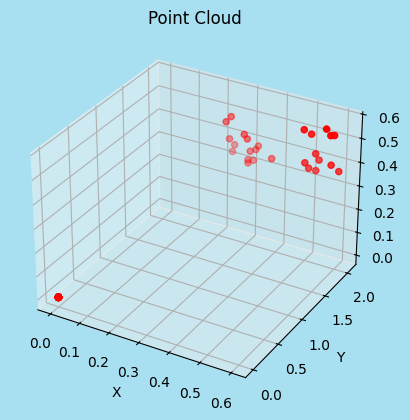

In [93]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Load the feature maps and extract the point cloud data
feature_maps = np.load('feature/featuremap_train.npy')


point_cloud = feature_maps[163, :, :, :].reshape(64, 5)

point_cloud_coords = point_cloud[:, :3]

# Plot the point cloud in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the background color to blue
ax.set_facecolor('#A8E0F1')
fig.patch.set_facecolor('#A8E0F1')

# Plot the point cloud
ax.scatter(point_cloud[:, 0], point_cloud_coords[:, 1], point_cloud_coords[:, 2], c='red', marker='o')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud')

# Show the plot
plt.show(block=True)

In [90]:
from keras.models import load_model

# Load the model
model = load_model('models/LSTM_rsf_16.keras')
model.summary()

model = load_model('models/MARS.keras')
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 16, 6, 6, 16)   │           736 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 16, 6, 6, 16)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 16, 4, 4, 32)   │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 16, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 16, 4, 4, 32)   │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 16, 512)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 16, 512)        │       262,656 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 57)             │       129,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 57)             │         3,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,208,248 (4.61 MB)

 Trainable params: 402,386 (1.53 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 804,774 (3.07 MB)

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 8, 8, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 16)       │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 57)             │        29,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,255,469 (12.42 MB)

 Trainable params: 1,084,793 (4.14 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 2,169,588 (8.28 MB)

None
